In [198]:
import numpy as np
import os
import matplotlib.pyplot as plt

from PIL import Image 

In [162]:
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier

In [163]:
train_data = '../data/raw/train/'
test_data = '../data/raw/test/'
val_data = '../data/raw/val/'

process_train = '../data/processed/train/'
process_test = '../data/processed/test/'
process_val = '../data/processed/val/'

category_names = ['messy/', 'clean/']

In [174]:
# Train GrayScale with new size 50x50

clean_train = []
messy_train = []
y_train = []

for category in category_names:
    
    path_processed = process_train+category
    
    for image in os.listdir(path_processed):
        
        image_treatment = Image.open(path_processed+image).resize((50,50))
        
        if category == 'messy/' :
            messy = np.asarray(image_treatment) /255 # bit format
            messy_train.append(messy)
            y_train.append([1])
        else:
            clean = np.asarray(image_treatment)/255 # bit format
            clean_train.append(clean)
            y_train.append([0])

In [188]:
# Train GrayScale with new size 50x50

x_val = []
y_val = []

for category in category_names:
    
    path_processed = process_val+category
    
    for image in os.listdir(path_processed):
        
        image_treatment = Image.open(path_processed+image).resize((50,50))
        
        if category == 'messy/' :
            messy = np.asarray(image_treatment) /255 # bit format
            x_val.append(messy)
            y_val.append(1)
        else:
            clean = np.asarray(image_treatment)/255 # bit format
            x_val.append(clean)
            y_val.append(0)


In [189]:
x_train = np.concatenate((messy_train,clean_train),axis=0)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)

print("messy:", np.shape(messy_train) , "clean:", np.shape(clean_train))

print('train x = ', x_train.shape)
print('train y = ', y_train.shape)
print('val x = ', x_val.shape)
print('val y = ', y_val.shape)

messy: (96, 50, 50, 2) clean: (96, 50, 50, 2)
train x =  (192, 50, 50, 2)
train y =  (192, 1)
val x =  (20, 50, 50, 2)
val y =  (20,)


In [190]:
def build_classifier():
    model = Sequential()

    model.add(Conv2D(64, (3,3), activation='relu', input_shape=(x_train.shape[1:]) ) )
    model.add(AveragePooling2D(2,2))
    
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(AveragePooling2D(2,2))
    model.add(Flatten())
    model.add(Dense( 1, activation="sigmoid"))
    
    return model

In [191]:
model = build_classifier()

In [192]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 48, 48, 64)        1216      
_________________________________________________________________
average_pooling2d_64 (Averag (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 22, 22, 32)        18464     
_________________________________________________________________
average_pooling2d_65 (Averag (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 3873      
Total params: 23,553
Trainable params: 23,553
Non-trainable params: 0
_________________________________________________

In [194]:
model.compile( optimizer='adam', loss='binary_crossentropy', metrics = ['acc'] )

In [196]:
history = model.fit(x_train, y_train, epochs=100, steps_per_epoch= 10, validation_data = (x_val, y_val) )

Epoch 1/100
10/10 [==============================] - 1s 62ms/step - loss: 0.0064 - acc: 1.0000 - val_loss: 2.0181 - val_acc: 0.6500
Epoch 2/100
10/10 [==============================] - 1s 50ms/step - loss: 0.0060 - acc: 1.0000 - val_loss: 2.0326 - val_acc: 0.6500
Epoch 3/100
10/10 [==============================] - 1s 52ms/step - loss: 0.0058 - acc: 1.0000 - val_loss: 2.0405 - val_acc: 0.6500
Epoch 4/100
10/10 [==============================] - 1s 54ms/step - loss: 0.0061 - acc: 1.0000 - val_loss: 2.0814 - val_acc: 0.6500
Epoch 5/100
10/10 [==============================] - 1s 60ms/step - loss: 0.0057 - acc: 1.0000 - val_loss: 2.0739 - val_acc: 0.6500
Epoch 6/100
10/10 [==============================] - 1s 54ms/step - loss: 0.0053 - acc: 1.0000 - val_loss: 2.0897 - val_acc: 0.6500
Epoch 7/100
10/10 [==============================] - 1s 67ms/step - loss: 0.0051 - acc: 1.0000 - val_loss: 2.1094 - val_acc: 0.6500
Epoch 8/100
10/10 [==============================] - 1s 60ms/step - loss: 0.

10/10 [==============================] - 1s 55ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.6967 - val_acc: 0.6500
Epoch 63/100
10/10 [==============================] - 1s 52ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.6971 - val_acc: 0.6500
Epoch 64/100
10/10 [==============================] - 0s 48ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.7010 - val_acc: 0.6500
Epoch 65/100
10/10 [==============================] - 0s 49ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.7138 - val_acc: 0.6500
Epoch 66/100
10/10 [==============================] - 0s 48ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.7244 - val_acc: 0.6500
Epoch 67/100
10/10 [==============================] - 0s 48ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.7157 - val_acc: 0.6500
Epoch 68/100
10/10 [==============================] - 0s 49ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.7386 - val_acc: 0.6500
Epoch 69/100
10/10 [==============================] - 0s 48ms/step - loss: 0.0010 

KeyError: 'accuracy'

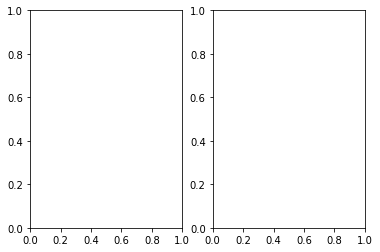

In [199]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()